### Student Information
Name: 高靖雅/Riley Kao/Ching-Ya Kao

Student ID: 109078501

GitHub ID: chinyakao

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

---

## FIRST - take home exercises in the DM2021-Lab1-master Repo

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

### >>> Exercise 1 (5 min):  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [2]:
# Answer here
for t in range(3):
    print(twenty_train.data[t])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

### >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
import pandas as pd
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

# Answer here
# 1. Select only text length larger than 10000 by callable
# 2. Rearrange the columns
# 3. Ramdom 10 rows as a preview
# 4. Sort the randomed by index

X.loc[lambda t: t.text.str.len() > 10000,('category','category_name','text')].sample(10).sort_index()

,category,category_name,text
178,0,alt.atheism,From: keith@cco.caltech.edu (Keith Allan Schne...
424,2,sci.med,From: david@stat.com (David Dodell) Subject: H...
753,3,soc.religion.christian,"From: af664@yfn.ysu.edu (Frank DeCenso, Jr.) S..."
768,1,comp.graphics,From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...
789,3,soc.religion.christian,From: davem@bnr.ca (Dave Mielke) Subject: Does...
1103,2,sci.med,From: noring@netcom.com (Jon Noring) Subject: ...
1138,0,alt.atheism,From: jbrown@batman.bmd.trw.com Subject: Re: D...
1401,2,sci.med,From: david@stat.com (David Dodell) Subject: H...
1403,0,alt.atheism,From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...
1585,2,sci.med,From: mcelwre@cnsvax.uwec.edu Subject: NATURAL...


### >>> Exercise 3 (5 min):
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [4]:
# Answer here
X.loc[lambda t: t.category_name == 'comp.graphics'][::10][0:4]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
43,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1,comp.graphics
76,From: sts@mfltd.co.uk (Steve Sherwood (x5543))...,1,comp.graphics
107,From: samson@prlhp1.prl.philips.co.uk (Mark Sa...,1,comp.graphics


### >>> Exercise 4 (5 min):
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [5]:
# Answer here
# set the axis=1 to calculate in every record
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> Exercise 5 (take home):
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Answer here**

String of NaN (`'NaN'`), real NaN with column(`np.nan`) and real NaN without column are treated differently by `isnull()`.
- String of NaN actually has the value of three character, N, a, and N.
- Real NaN with column but set by the `numpy.nan` tells the `isnull()` it is real missing value
- Real NaN without column tells the `isnull()` there is nothing in this column and it is real missing value

String of None(`'None'`), real None set by reserved word(`None`) and String of nothing are treated differently by `isnull()`.
- String of None actually has the value of four character, N, o, n, and e.
- Real None set by reserved word(`None`) tells the `isnull()` it is real missing value
- String of nothing actually tells `isnull()` it is a string but no character inside, but it is still a value.

In order to use .isnull effectively, all the strings that represent the meaning of null value (which are 'NaN', 'None', and '') must be replaced as either np.nan or None first.

### >>> Exercise 6 (take home):
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [8]:
# Answer here
# X dataframe before using .sample()
print("length of data: ", len(X), "\nfirst 4 records:")
X[0:4]

length of data:  2257 
first 4 records:


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian


In [9]:
# random 1st time
X_sample = X.sample(n=1000)
print("length of data: ", len(X_sample), "\nfirst 4 records:")
X_sample[0:4]

length of data:  1000 
first 4 records:


,text,category,category_name
581,From: mryan@stsci.edu Subject: Should I be ang...,2,sci.med
854,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,0,alt.atheism
430,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
1957,From: ARowatt@massey.ac.nz (A.J. Rowatt) Subje...,1,comp.graphics


In [10]:
# random 2nd time
X_sample = X.sample(n=1000)
print("length of data: ", len(X_sample), "\nfirst 4 records:")
X_sample[0:4]

length of data:  1000 
first 4 records:


,text,category,category_name
187,Subject: Re: Request for Support From: kmr4@po...,0,alt.atheism
1564,From: frank@D012S658.uucp (Frank O'Dwyer) Subj...,0,alt.atheism
656,From: fulk@cs.rochester.edu (Mark Fulk) Subjec...,2,sci.med
1620,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med


In [11]:
# X dataframe after using .sample(), no changes
print("length of data: ", len(X), "\nfirst 4 records:")
X[0:4]

length of data:  2257 
first 4 records:


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian


**Answer here**

`.sample()` doesn't change original `X`, and only returns a set of randomly selected records from `X` and store in `X_sample`.
Two times of sampling `X` sampled by `.sample()` select different random records from `X`.  

### >>> Exercise 7 (5 min):
Notice that for the ylim parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

soc.religion.christian    270
comp.graphics             256
sci.med                   248
alt.atheism               226
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

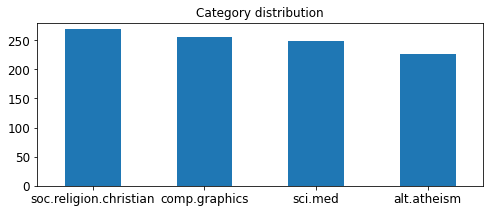

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# Answer here
# plot barchart for X_sample
X_sample_counts = X_sample.category_name.value_counts()
print(X_sample_counts)

# plot barchart for X_sample
X_sample_counts.plot(kind = 'bar',
                     title = 'Category distribution',
                     ylim = [0, max(X_sample_counts) + 10], 
                     rot = 0, fontsize = 12, figsize = (8,3))

### >>> Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

![alt txt](https://i.imgur.com/9eO431H.png)

<AxesSubplot:title={'center':'Category distribution'}>

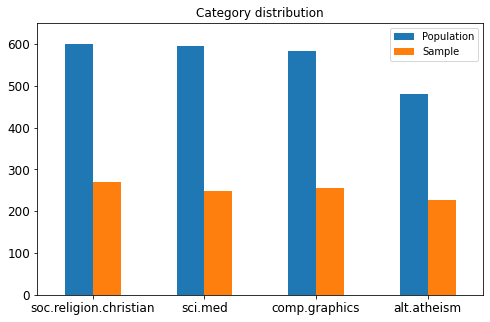

In [13]:
# Answer here
X_sample_counts = X_sample.category_name.value_counts() # X_sample dataset
X_counts = X.category_name.value_counts()               # X dataset

# join 2 datasets into one single dataframe
X_join = pd.DataFrame({ "Population": X_counts, "Sample": X_sample_counts}, index=categories).sort_index(ascending=False)
X_join.plot(kind = 'bar', title = 'Category distribution', ylim = [0, 650], 
            rot = 0, fontsize = 12, figsize = (8,5))

### >>> Exercise 9 (5 min):
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [14]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

In [15]:
# Answer here
analyze(X.iloc[0]['text'])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### >>> Exercise 10 (take home):
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [16]:
# Answer here
# get fifth record, convert to 1-row 2D-array, and flatten into 1D-array
fifth_record = X_counts[4, 0:100].toarray().flatten() 
# get feature names
terms_array = np.array(count_vect.get_feature_names()[0:100]) 

# joining counts and feature names into one dataframe
join_df = pd.DataFrame({"term":terms_array, "count_num":fifth_record}) 
# show the exist terms and the second term is the answer
join_df.loc[lambda t: t.count_num >= 1]

,term,count_num
0,00,1
37,01,1


### >>> Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

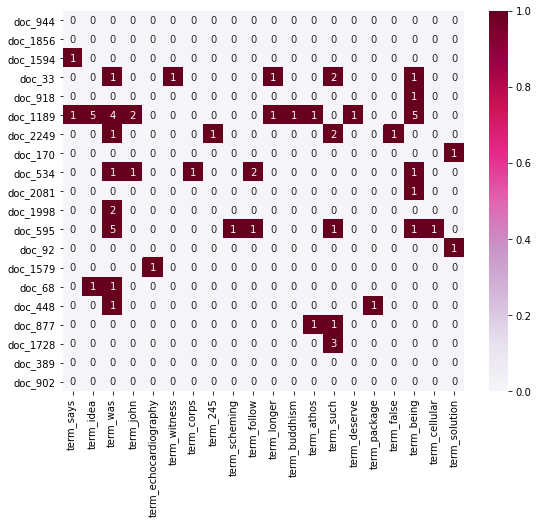

In [17]:
# Answer here
import seaborn as sns
from random import sample # for sample a list

# make a new sample of X and count vectorizer the new sample
sample_X = X.sample(n=20) 
sample_count_vect = CountVectorizer()
sample_X_counts = sample_count_vect.fit_transform(sample_X.text)

# sample 20 terms from this sample_X
term_array = np.array(sample_count_vect.get_feature_names()) # convert terms to an array
sample_index = sample(range(0,len(term_array)), 20)          # get 20 sample index from array length
sample_term = list(term_array[sample_index])                 # get the 20 sample terms by sampled index

# define the xyz of the heat map
plot_x = ["term_"+str(i) for i in sample_term]
plot_y = ["doc_"+ str(i) for i in list(sample_X.index)]
plot_z = sample_X_counts[:, sample_index].toarray()          # only get the 20 sample index's counts

# draw the heat map
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

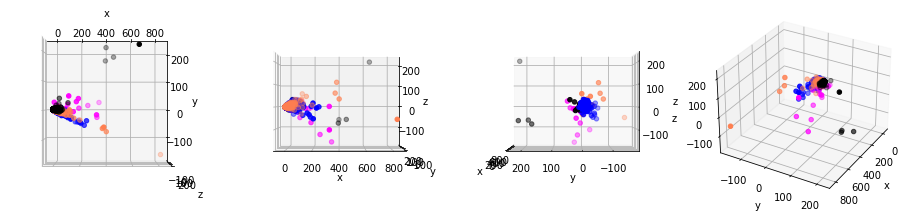

In [18]:
# Answer here
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'magenta']

# plot
fig = plt.figure(figsize = (16,6))

# function for generating side-by-side 3D plots
# ref: https://stackoverflow.com/questions/35492954/side-by-side-identical-axes3d-with-different-orientation
def makeplotX(posit,elev,azim):
    ax = fig.add_subplot(posit,projection='3d')
    
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o')
            
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev, azim)
    return ax 

ax1 = makeplotX(141,90,270) # camera on x-y
ax2 = makeplotX(142,0,270)  # camera on x-z
ax3 = makeplotX(143,0,180)  # camera on y-z
ax4 = makeplotX(144,30,30)  # camera on 3D angle overview x-y-z

plt.show()

**Answer here**

In first three plots, trying to see the scatter plots in two axis is easier for human recognize the difference. The last plot(right hand side) provide us an overview of this 3D plot. In PCA3, no matter what angle we look at, the blue points are more closer to each other than PCA2. As for black points, there are outliers far away from others in PCA3. It is same situation with PCA2. We can see points of the distances clearer than PCA2 plot through different color, different angle and different position.

### >>> Exercise 13 (take home) & Exercise 14 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [19]:
# Exercise 14 Answer here
# Limit the max number of terms
limit_count_vect = CountVectorizer(max_features=200)
limit_X_counts = limit_count_vect.fit_transform(X.text)

# Limit max number of terms to count so that this part doesn't takes that much time to compute frequencies. 
term_frequencies = []
for j in range(0,limit_X_counts.shape[1]):
    term_frequencies.append(sum(limit_X_counts[:,j].toarray()))
term_frequencies = np.asarray(limit_X_counts.sum(axis=0))[0]

In [20]:
# Exercise 13 Answer here
import plotly.graph_objs as go
import plotly.offline as pof

# set offline
pof.init_notebook_mode(connected = True)

# set graph data
data = [go.Bar(x=np.array(limit_count_vect.get_feature_names()), y=term_frequencies)]

# add a graph title and x-axis is categorical data
layout = go.Layout(title='Word Frequency', xaxis=dict(type='category'))  

# combine data and layout
fig = go.Figure(data=data, layout=layout)

# plot the figure
# provide a link so that you can access the interactive plot on plotly website
pof.iplot(fig, show_link = True, link_text = "Word Frequency Plotly Links")

### >>> Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [21]:
# combine term and frequency into a dataframe for sorting
comb_df = pd.DataFrame({"term":list(limit_count_vect.get_feature_names()),
                        "freq":list(term_frequencies)}).sort_values(by=['freq'], ascending=False)
comb_df

,term,freq
151,the,29825
109,of,17660
165,to,17222
8,and,13017
81,is,12343
...,...,...
163,through,371
46,doesn,369
39,course,366
12,anything,366


In [22]:
# offline interactive bar plot
data = [go.Bar(x=comb_df['term'],y=comb_df['freq'])]
layout = go.Layout(title="Sorted Word Frequency", xaxis=dict(type='category'))
fig = go.Figure(data=data, layout=layout)

# plot the figure
# provide a link so that you can access the interactive plot on plotly website
pof.iplot(fig, show_link = True, link_text = "Sorted Word Frequency Plotly Links")

### >>> Exercise 16 (take home):
Try to generate the binarization using the category_name column instead. Does it work?

In [23]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:10] # Yes, it works!

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[From, :, libman, @, hsc.usc.edu, (, Marlena, ...","[0, 0, 1, 0]"


---

## SECOND -  follow the same process from the DM2021-Lab1-master Repo on the new dataset. 

### 1. Data Source
Download the the [new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details.

---

### 2. Data Preparation

In [24]:
# read in data
amazon_data = pd.read_csv("data/amazon_cells_labelled.txt", sep="\t", names=["sentence", "score"])
imdb_data = pd.read_csv("data/imdb_labelled.txt", sep="\t", names=["sentence", "score"])
yelp_data = pd.read_csv("data/yelp_labelled.txt", sep="\t", names=["sentence", "score"])

# add source column
amazon_data['source'] = "amazon"
imdb_data['source'] = "imdb"
yelp_data['source'] = "yelp"

### 3. Data Transformation

#### 3.1 Converting Dictionary into Pandas dataframe
#### 3.2 Familiarizing yourself with the Data

In [25]:
# combine all of them into a dataframe
Y = pd.concat([amazon_data, imdb_data, yelp_data], ignore_index = True)
Y

,sentence,score,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2743,I think food should have flavor and texture an...,0,yelp
2744,Appetite instantly gone.,0,yelp
2745,Overall I was not impressed and would not go b...,0,yelp
2746,"The whole experience was underwhelming, and I ...",0,yelp


### 4. Data Mining using Pandas

#### 4.1 Dealing with Missing Values

In [26]:
Y.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


#### 4.2 Dealing with Duplicate Data

In [27]:
sum(Y.duplicated())
# There are 17 duplicate records

17

In [28]:
# Try to see the duplicate records
# It shows that there are not really duplicated records
Y[Y.duplicated()]

,sentence,score,source
285,Great phone!.,1,amazon
407,Works great.,1,amazon
524,Works great!.,1,amazon
543,Don't buy this product.,0,amazon
744,If you like a loud buzzing to override all you...,0,amazon
748,Does not fit.,0,amazon
778,This is a great deal.,1,amazon
792,Great Phone.,1,amazon
892,Excellent product for the price.,1,amazon
896,Great phone.,1,amazon


### 5. Data Preprocessing

#### 5.1 Sampling

In [29]:
Y_sample = Y.sample(n=1000)
Y_sample

,sentence,score,source
327,The plug did not work very well.,0,amazon
1557,Nine out of ten for a truly lovely film.,1,imdb
822,I have been very satisfied with this cell phon...,1,amazon
1298,This movie is a good and humorous comment on l...,1,imdb
299,Battery life still not long enough in Motorola...,0,amazon
...,...,...,...
1971,Hopefully this bodes for them going out of bus...,0,yelp
1148,There is a brilliant twist ending.,1,imdb
1655,Hated it.,0,imdb
227,I'm a bit disappointed.,0,amazon


<AxesSubplot:title={'center':'Category of source distribution'}>

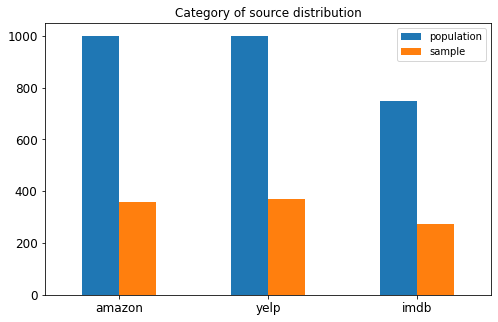

In [30]:
# join population and sample datasets
join_Y = pd.DataFrame({
            "population":Y.source.value_counts(),          # Y dataset
            "sample":Y_sample.source.value_counts()},      # Y_sample dataset
        ).sort_values(by=['population'], ascending=False)  # sort descending by counts of category_name in Y dataset

join_Y.plot(kind = 'bar', title = 'Category of source distribution', rot = 0, fontsize = 12, figsize = (8,5))

#### 5.2 Feature Creation

In [31]:
Y['unigrams'] = Y['sentence'].apply(lambda x: dmh.tokenize_text(x))
Y

,sentence,score,source,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,"[The, mic, is, great, .]"
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,yelp,"[I, think, food, should, have, flavor, and, te..."
2744,Appetite instantly gone.,0,yelp,"[Appetite, instantly, gone, .]"
2745,Overall I was not impressed and would not go b...,0,yelp,"[Overall, I, was, not, impressed, and, would, ..."
2746,"The whole experience was underwhelming, and I ...",0,yelp,"[The, whole, experience, was, underwhelming, ,..."


#### 5.3 Feature Subset Selection

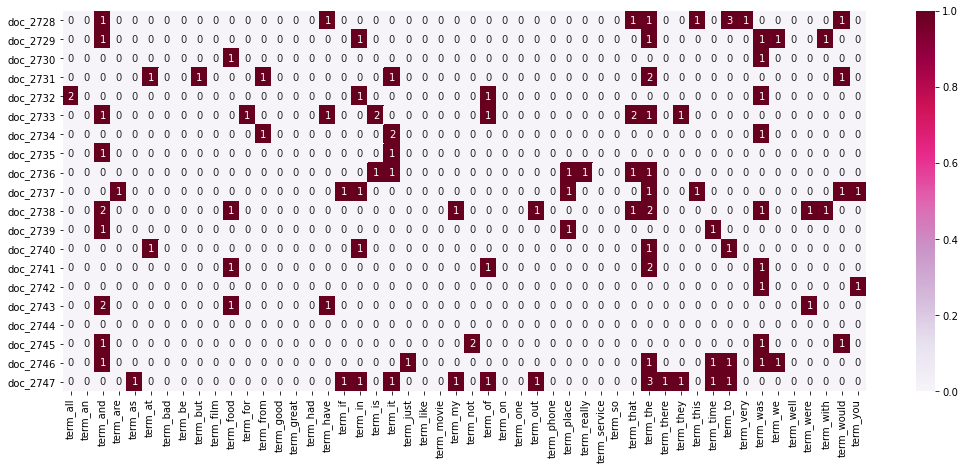

In [32]:
# Let's try to see the last 20 sentences with top 50 high frequency words
count_vect = CountVectorizer(max_features=50)
Y_counts = count_vect.fit_transform(Y.sentence) 

# define the xyz of the heat map
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]   # top 50 words
plot_y = ["doc_"+ str(i) for i in list(Y.index)[-20:]]                    # last 20 sentences
plot_z = Y_counts[-20:, 0:50].toarray()

# draw the heat map
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

#### 5.4 Dimensionality Reduction

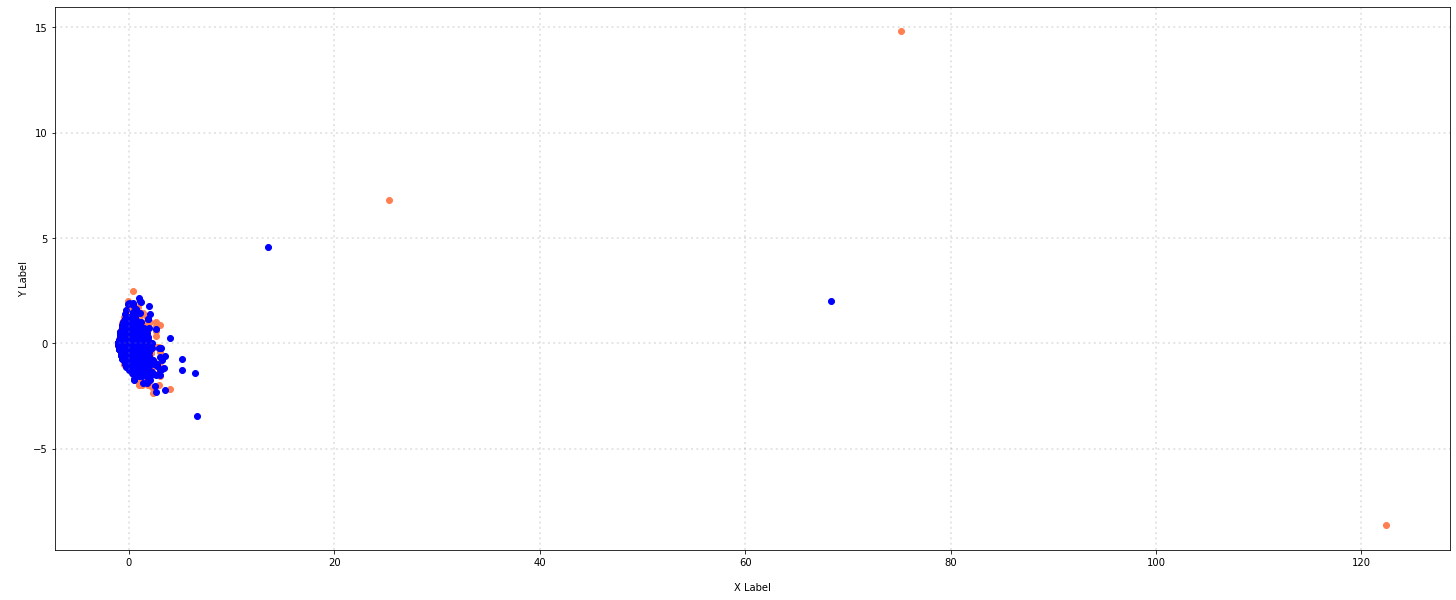

In [33]:
col = ['coral', 'blue']
score_categories = [0, 1]

# Let's try PCA2
Y_reduced = PCA(n_components = 2).fit_transform(Y_counts.toarray())

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, score_categories):
    xs = Y_reduced[Y['score'] == category].T[0]
    ys = Y_reduced[Y['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

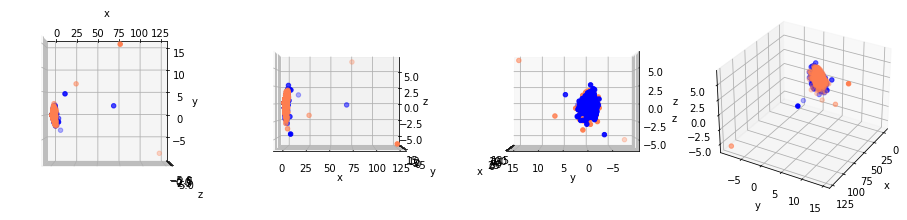

In [34]:
# Let's try PCA3
Y_reduced = PCA(n_components = 3).fit_transform(Y_counts.toarray())


# plot
fig = plt.figure(figsize = (16,6))

# function for generating side-by-side 3D plots
def makeplotY(posit,elev,azim):
    ax = fig.add_subplot(posit,projection='3d')
    
    for c, category in zip(col, score_categories):
        xs = Y_reduced[Y['score'] == category].T[0]
        ys = Y_reduced[Y['score'] == category].T[1]
        zs = Y_reduced[Y['score'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o')
            
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev, azim)
    return ax 

ax1 = makeplotY(141,90,270) # camera on x-y
ax2 = makeplotY(142,0,270)  # camera on x-z
ax3 = makeplotY(143,0,180)  # camera on y-z
ax4 = makeplotY(144,30,30)  # camera on 3D angle overview x-y-z

plt.show()

#### 5.5 Atrribute Transformation / Aggregation

In [35]:
# let's try to make a sorted plot and find the long tail
term_frequencies = []
for j in range(0,Y_counts.shape[1]):
    term_frequencies.append(sum(Y_counts[:,j].toarray()))
term_frequencies = np.asarray(Y_counts.sum(axis=0))[0]

# combine term and frequency into a dataframe for sorting
comb_df = pd.DataFrame({"term":list(count_vect.get_feature_names()),
                        "freq":list(term_frequencies)}).sort_values(by=['freq'], ascending=False)

# set graph data
data = [go.Bar(x=comb_df['term'],y=comb_df['freq'])]

# add a graph title and x-axis is categorical data
layout = go.Layout(title="Sorted Word Frequency", xaxis=dict(type='category'))

# combine data and layout
fig = go.Figure(data=data, layout=layout)

# plot the figure
# provide a link so that you can access the interactive plot on plotly website
pof.iplot(fig, show_link = True, link_text = "Sorted Word Frequency Plotly Links")

In [36]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

comb_df = pd.DataFrame({"term":list(count_vect.get_feature_names()),
                        "freq_log":list(term_frequencies_log)}).sort_values(by=['freq_log'], ascending=False)

# plot the figure
data = [go.Bar(x=comb_df['term'],y=comb_df['freq_log'])]
layout = go.Layout(title="Sorted Log of Word Frequency", xaxis=dict(type='category'))
fig = go.Figure(data=data, layout=layout)

# provide a link so that you can access the interactive plot on plotly website
pof.iplot(fig, show_link = True, link_text = "Sorted Log of Word Frequency Plotly Links")

#### 5.6 Discretization and Binarization

In [37]:
# Let's binarized source values to create bin_source column 
mlb.fit(Y.source)
Y['bin_source'] = mlb.transform(Y['source']).tolist()

# Let's binarized score values to create bin_score column
# However, the score is already binary. Binarization is thus not necessary.
mlb.fit(Y.score)
Y['bin_score'] = mlb.transform(Y['score']).tolist()
Y[0:10]

,sentence,score,source,unigrams,bin_source,bin_score
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]",[0]
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]",[1]
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]",[1]
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]",[0]
4,The mic is great.,1,amazon,"[The, mic, is, great, .]","[1, 0, 0]",[1]
5,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]",[0]
6,If you have several dozen or several hundred c...,0,amazon,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]",[0]
7,If you are Razr owner...you must have this!,1,amazon,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]",[1]
8,"Needless to say, I wasted my money.",0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]",[0]
9,What a waste of money and time!.,0,amazon,"[What, a, waste, of, money, and, time, !, .]","[1, 0, 0]",[0]


### 6. Data Exploration

In [38]:
# We retrieve 3 sentences for a random record, here, indexed at 40, 50 and 60 
document_to_transform_1 = []
random_record_1 = Y.iloc[40]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = Y.iloc[50]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = Y.iloc[60]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [39]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['It has a great camera thats 2MP, and the pics are nice and clear with great picture quality.']
["Not loud enough and doesn't turn on like it should."]
["Essentially you can forget Microsoft's tech support."]


In [40]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 2 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 1 0 0]]
[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


In [41]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})


Cosine Similarity using count bw 1 and 2: 0.387298
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


---

## THIRD - please attempt the following tasks on the new dataset.
- a. New data visualizations
- b. TF-IDF feature
- c. Naive Bayes classifier

### a. New data visualizations

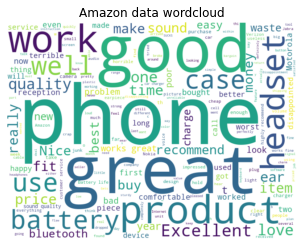

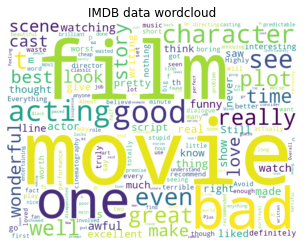

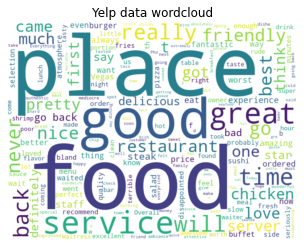

In [42]:
# Let's try to see the word cloud in amazon data
amazon_data = pd.Series.to_string(Y.loc[lambda f: f.source=="amazon"]['sentence'],index=False)
imdb_data = pd.Series.to_string(Y.loc[lambda f: f.source=="imdb"]['sentence'],index=False)
yelp_data = pd.Series.to_string(Y.loc[lambda f: f.source=="yelp"]['sentence'],index=False)

# plot a word cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

amazon_wordcloud = WordCloud(width=800, height=600, max_words=200, stopwords=stopwords, background_color="white").generate(amazon_data)
imdb_wordcloud = WordCloud(width=800, height=600, max_words=200, stopwords=stopwords, background_color="white").generate(imdb_data)
yelp_wordcloud = WordCloud(width=800, height=600, max_words=200, stopwords=stopwords, background_color="white").generate(yelp_data)

plt.title("Amazon data wordcloud")
plt.axis("off")
plt.imshow(amazon_wordcloud, interpolation="bilinear")
plt.show()

plt.title("IMDB data wordcloud")
plt.axis("off")
plt.imshow(imdb_wordcloud, interpolation="bilinear")
plt.show()

plt.axis("off")
plt.title("Yelp data wordcloud")
plt.imshow(yelp_wordcloud, interpolation="bilinear")
plt.show()

### b. TF-IDF feature
Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

#### Compare TF-IDF with pure Word Frequency
- Word Frequency `CountVectorizer`
    - Word Frequency is just counting the number of word existing in records.
    - Some words like, the, and, is, may have high frequency appearing in the documents, but they may not carry an insightful meaning in the document compare to words with less-frequency.
- TF-IDF `TfidfVectorizer `
    - TF-IDF(term frequency-inverse document frequency) weights the number of words by measuring the frequency of their appearance in the document.
    - TF-IDF first converts our text into the matrix of term counts, which is the same as when we apply CountVectorizer in the Feature subset selection above. Then, it computes from its definition and the result comes to 0 to 1 in each term.
    - the higher frequency the words found in the document, the lower score those words get. And the lower score means less important. word with lower frequency will become higher score.

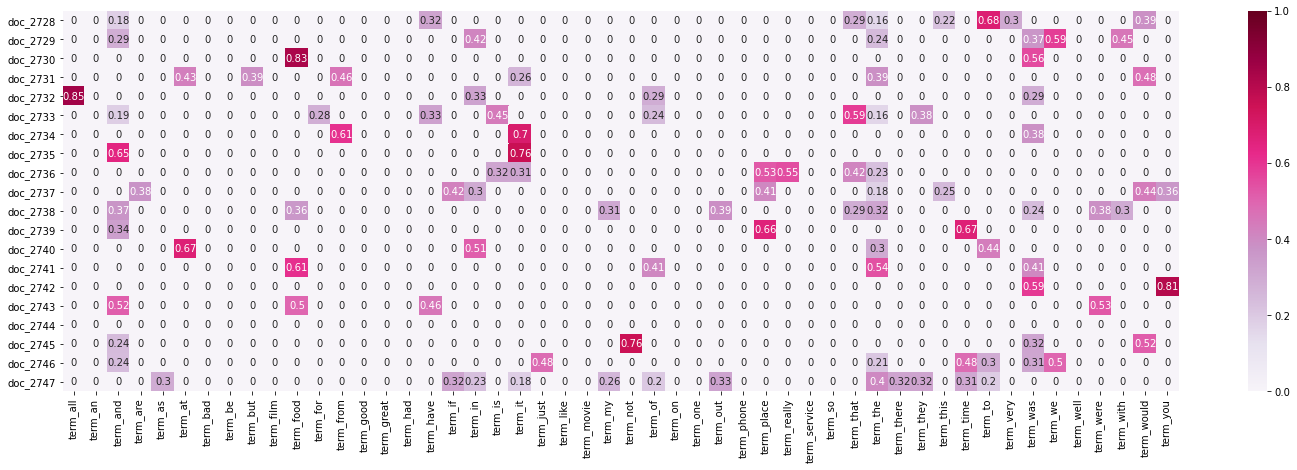

In [43]:
# Let's try TF-IDF features to see the last 20 sentences with top 50 high frequency words
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect_tfidf = TfidfVectorizer(max_features=50)
Y_counts_tfidf = count_vect_tfidf.fit_transform(Y.sentence) 

# define the xyz of the heat map
plot_x = ["term_"+str(i) for i in count_vect_tfidf.get_feature_names()[0:50]]   # top 50 words
plot_y = ["doc_"+ str(i) for i in list(Y.index)[-20:]]                          # last 20 sentences
plot_z = Y_counts_tfidf[-20:, 0:50].toarray()

# draw the heat map
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

### c. Naive Bayes classifier
Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

#### Prepare for modeling

In [44]:
# split data into testing set and training set
# 80% of data into the training set, while the rest 20% is used as a testing set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Y['sentence'], Y['score'], test_size=0.2, random_state=345)

#### Model1: build by word frequency feature
We will apply `MultinomialNB()` to our testing data. 
As the documentation from scikit learn suggests,the multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification)

In [45]:
# Use CountVectorizer() to make document-term matrix
count_vect = CountVectorizer()
train_term = count_vect.fit_transform(X_train)
test_term = count_vect.transform(X_test)

# Prediction
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(train_term, y_train)
predict_test = clf.predict(test_term)

# Sample query: lets's take a glance on actual and predicted score
check_df = pd.DataFrame({'sentence':list(X_test), 'score_actual': list(y_test), 'score_predicted': list(predict_test)})
check_df.iloc[::5][0:10]

,sentence,score_actual,score_predicted
0,My fella got the huevos rancheros and they did...,0,0
5,"The service was not up to par, either.",0,0
10,Excellent bluetooth headset.,1,1
15,Very disappointed and wondered how it could be...,0,0
20,"Good case, Excellent value.",1,1
25,I could not stand to even watch it for very lo...,0,0
30,"Muddy, low quality sound, and the casing aroun...",0,0
35,This is not movie-making.,0,0
40,Couldn't ask for a more satisfying meal.,1,1
45,So in a nutshell: 1) The restaraunt smells lik...,0,0


Accuracy score:  0.8109090909090909
Report of model 1: (using word frequency features)
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       283
           1       0.84      0.75      0.79       267

    accuracy                           0.81       550
   macro avg       0.81      0.81      0.81       550
weighted avg       0.81      0.81      0.81       550

Confusion matrix of model 1: using word frequency features


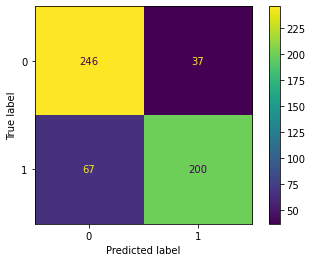

In [46]:
# Report of model1 prediction
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

print('Accuracy score: ', accuracy_score(y_test, predict_test))

print('Report of model 1: (using word frequency features)')
print(classification_report(y_test, predict_test))

plot_confusion_matrix(clf, test_term, y_test)
print('Confusion matrix of model 1: using word frequency features')
plt.show()

#### Model2: build by TF-IDF

In [47]:
# Use TF-IDF to make a matrix
tfidf_vect = TfidfVectorizer()
train_term_idf = tfidf_vect.fit_transform(X_train)
test_term_idf = tfidf_vect.transform(X_test)

# Prediction
clf2 = MultinomialNB()
clf2.fit(train_term_idf, y_train)
predict_test_idf = clf2.predict(test_term_idf)

# Sample query: lets's take a glance on actual and predicted score
check_df = pd.DataFrame({'sentence':list(X_test), 'score_actual': list(y_test), 'score_predicted': list(predict_test_idf)})
check_df.iloc[::5][0:10]

,sentence,score_actual,score_predicted
0,My fella got the huevos rancheros and they did...,0,0
5,"The service was not up to par, either.",0,0
10,Excellent bluetooth headset.,1,1
15,Very disappointed and wondered how it could be...,0,0
20,"Good case, Excellent value.",1,1
25,I could not stand to even watch it for very lo...,0,0
30,"Muddy, low quality sound, and the casing aroun...",0,0
35,This is not movie-making.,0,0
40,Couldn't ask for a more satisfying meal.,1,1
45,So in a nutshell: 1) The restaraunt smells lik...,0,0


Accuracy score:  0.8290909090909091
Report of model 2: using TF-IDF features
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       283
           1       0.83      0.81      0.82       267

    accuracy                           0.83       550
   macro avg       0.83      0.83      0.83       550
weighted avg       0.83      0.83      0.83       550

Confusion matrix of model 2: using TF-IDF features


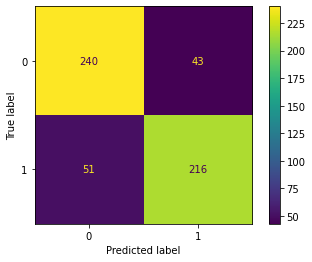

In [48]:
# Report of model2 prediction
print('Accuracy score: ', accuracy_score(y_test, predict_test_idf))

print('Report of model 2: using TF-IDF features')
print(classification_report(y_test, predict_test_idf))

plot_confusion_matrix(clf2, test_term_idf, y_test)
print('Confusion matrix of model 2: using TF-IDF features')
plt.show()

#### Differences between using word frequency and TF-IDF features
There is slightly diffrence
- The accuracy of model 2 (TF-IDF) is 0.829 and model 1 (word freq) is 0.810
- Model 1 (word freq) has higher precision than model 2 (TF-IDF) on predicting 1 score, 0.84 > 0.83.
- Model 1 (word freq) has lower precision than model 2 (TF-IDF) on predicting 0 score, 0.79 < 0.82.

Overall, it is quite same result between word frequency and TF-IDF. The accuracy of model 2 (TF-IDF) is only a little bit higher than model 1 (word freq). 
The other concern is **stop word**. Stop words are words considered uninformative in the text, example of stop words are “and”, “the”. The result might affect by the **stop word** which are all included in these two matrix. Those stop words may bring the meaningless result and effect accuracy.

---

## FOURTH - Improve for these specific datasets
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth 10% of your grade.

**Overall**

1. Sampling without fix seed makes the result different everytime which takes time to do. 
    - Add fix seed in the sampling 
2. Ploting heatmap of sparse matrix takes times to see a lot of ZERO.
    - Specify the records you would like to see instead of the whole dataset.
3. There is a lot of meaningless number or character, eg. 00, 001, @, when we do the feature subset selection.
    - Add stop_word argument to remove stop_word
4. Trying to find the long tail in such many meaningless words are quite meaningless.
    - Add stop_word argument to remove stop_word.

**First dataset**

1. The email format is inclued in the text data which is not a clear text data. 
    - It should seperate the column from email format. eg. From, Subject, Nntp-Posting-Host, etc.

**Second dataset**

1. We cannot really find the duplicated data by `.duplicated()`.
    - We can consider add argument in this function or find other way to do.

---

###### END of Lab1 notebook